In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sber_data = pd.read_csv('data/data-cleaning/sber_data.csv')
sber_data.tail()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,30469,44,27.0,7.0,Otradnoe,5088.0,4,12721.0,4,0,...,1.103579,0.167718,0.349899,1.235066,0.612359,7.482165,4.836787,good,0,7400000
30467,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,0,25000000
30468,30471,45,NaN,10.0,Poselenie Vnukovskoe,NaN,0,NaN,0,0,...,4.338453,1.339078,1.234235,1.192543,1.186621,13.459593,9.890758,no data,0,6970959
30469,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,0,13500000
30470,30473,43,28.0,1.0,Novogireevo,2215.0,4,5824.0,4,0,...,2.108265,0.825811,0.378950,0.480531,0.867332,0.688707,0.127867,poor,0,5600000


In [3]:
sber_data['sub_area'].nunique()
sber_data['price_doc'].max()


111111112

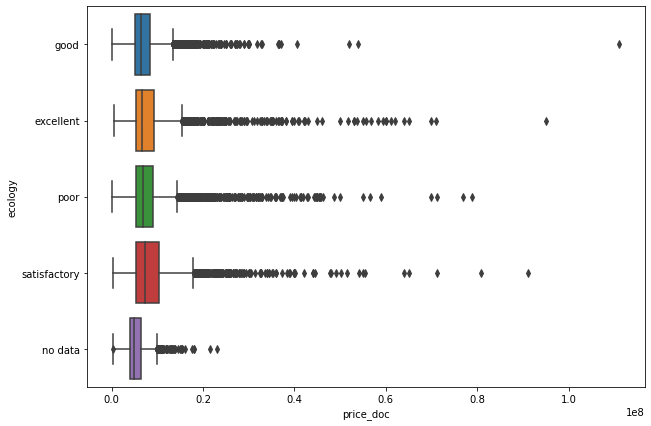

In [4]:
fig = plt.figure(figsize=(10,7))
box_data = sns.boxplot(
    data = sber_data, 
    x = 'price_doc',
    y = 'ecology',
    orient='h',
    width = 0.8
)

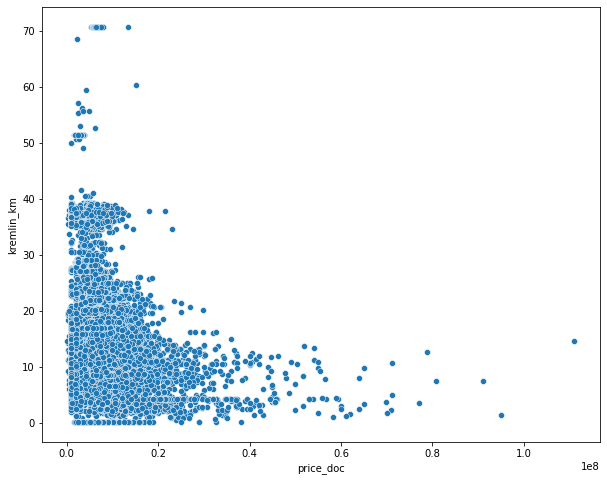

In [5]:
fig1 = plt.figure(figsize=(10, 8))

scatter_data = sns.scatterplot(
    data = sber_data,
    x = 'price_doc',
    y = 'kremlin_km',
    
)

<AxesSubplot:title={'center':'Распределение пропусков данных'}>

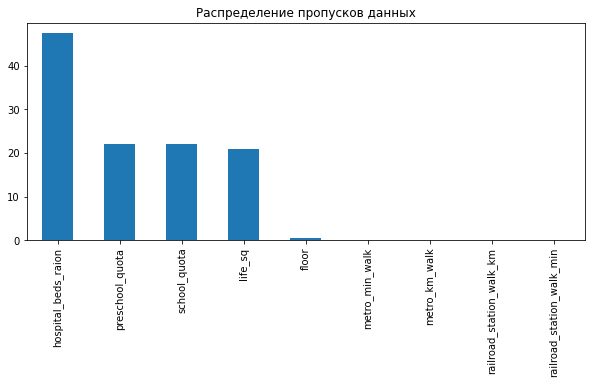

In [6]:
cols_null_precent = sber_data.isnull().mean() * 100
cols_with_null = cols_null_precent[cols_null_precent > 0].sort_values(ascending=False)
cols_with_null.plot(
    kind='bar',
    figsize=(10,4),
    title='Распределение пропусков данных'
)


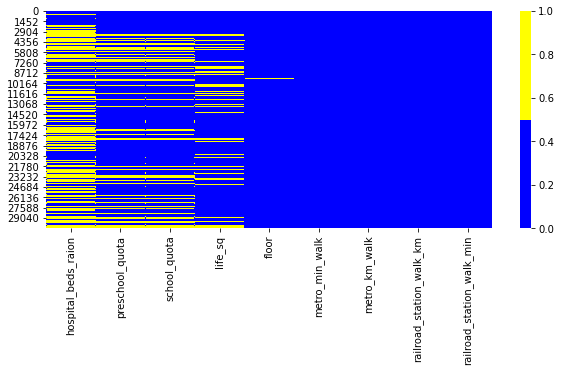

In [7]:
colors = ['blue', 'yellow']
fig = plt.figure(figsize=(10,4))
cols = cols_with_null.index
ax = sns.heatmap(
    sber_data[cols].isnull(),
    cmap=sns.color_palette(colors)
)



In [8]:
drop_data = sber_data.copy()

thresh = drop_data.shape[0]*0.7
drop_data = drop_data.dropna(how='any', thresh=thresh, axis=1)
drop_data = drop_data.dropna(how='any', axis=0)
drop_data.isnull().mean()
print(drop_data.shape)

(20888, 60)


array([[<AxesSubplot:title={'center':'hospital_beds_raion'}>,
        <AxesSubplot:title={'center':'preschool_quota'}>,
        <AxesSubplot:title={'center':'school_quota'}>],
       [<AxesSubplot:title={'center':'life_sq'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'metro_min_walk'}>],
       [<AxesSubplot:title={'center':'metro_km_walk'}>,
        <AxesSubplot:title={'center':'railroad_station_walk_km'}>,
        <AxesSubplot:title={'center':'railroad_station_walk_min'}>]],
      dtype=object)

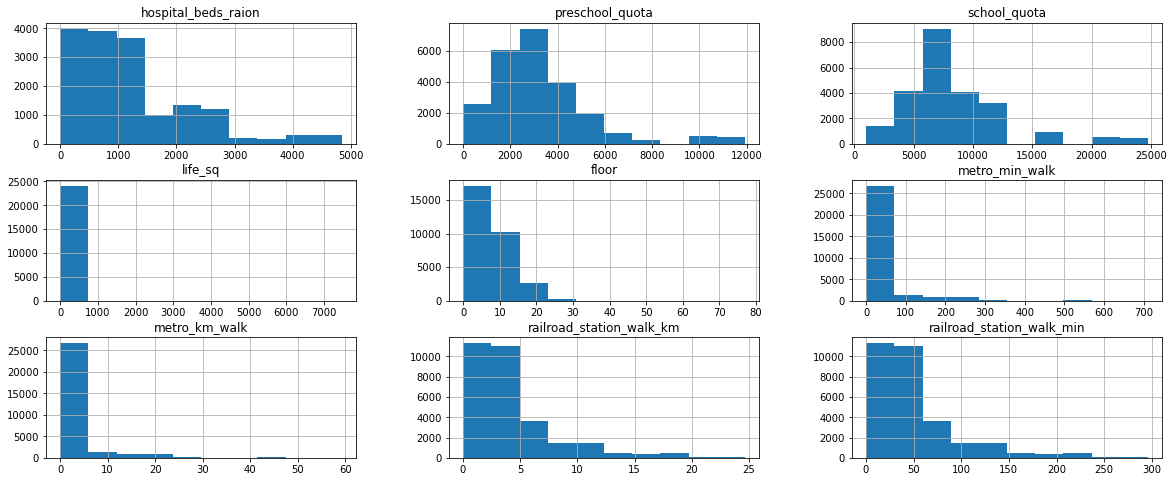

In [9]:
cols = cols_with_null.index
cols
sber_data[cols].hist(figsize=(20,8))

In [10]:
sber_data.columns

Index(['id', 'full_sq', 'life_sq', 'floor', 'sub_area', 'preschool_quota',
       'preschool_education_centers_raion', 'school_quota',
       'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'hospital_beds_raion',
       'healthcare_centers_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion',
       'culture_objects_top_25_raion', 'shopping_centers_raion',
       'office_raion', 'oil_chemistry_raion', 'railroad_terminal_raion',
       'nuclear_reactor_raion', 'metro_min_avto', 'metro_km_avto',
       'metro_min_walk', 'metro_km_walk', 'kindergarten_km', 'school_km',
       'park_km', 'green_zone_km', 'industrial_km', 'railroad_station_walk_km',
       'railroad_station_walk_min', 'public_transport_station_km',
       'public_transport_station_min_walk', 'mkad_km', 'ttk_km', 'sadovoe_km',
       'bulvar_ring_km', 'kremlin_km', 'big_road1_1line', 'big_market_km',
       'market_shop_km', 'fitness_km', 'swim_pool_k

array([[<AxesSubplot:title={'center':'hospital_beds_raion'}>,
        <AxesSubplot:title={'center':'preschool_quota'}>,
        <AxesSubplot:title={'center':'school_quota'}>],
       [<AxesSubplot:title={'center':'life_sq'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'metro_min_walk'}>],
       [<AxesSubplot:title={'center':'metro_km_walk'}>,
        <AxesSubplot:title={'center':'railroad_station_walk_km'}>,
        <AxesSubplot:title={'center':'railroad_station_walk_min'}>]],
      dtype=object)

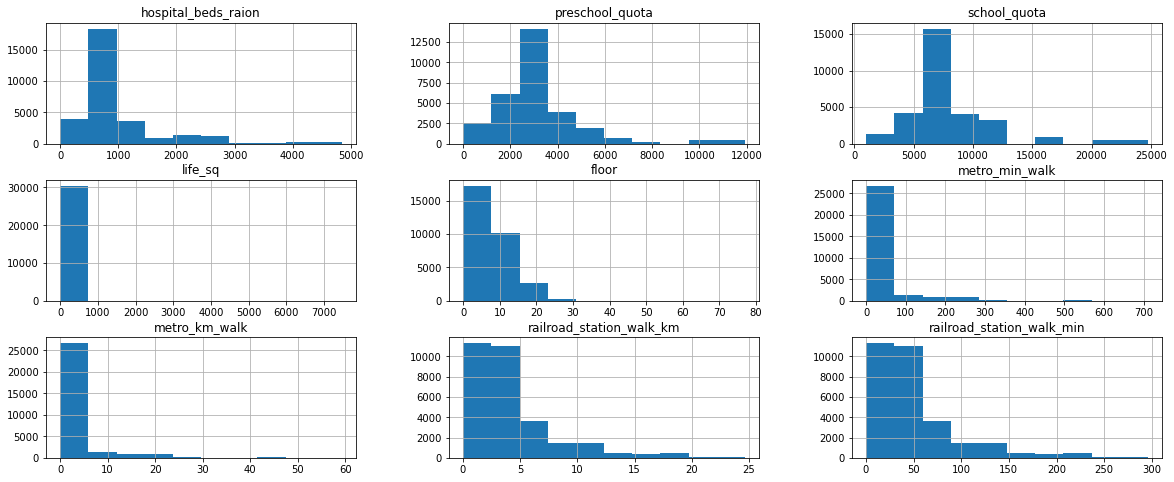

In [11]:
fill_data = sber_data.copy()
values = {
    'life_sq': fill_data['full_sq'],
    'metro_min_walk': fill_data['metro_min_walk'].median(),
    'metro_km_walk': fill_data['metro_km_walk'].median(),
    'railroad_station_walk_km': fill_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': fill_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': fill_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': fill_data['preschool_quota'].mode()[0],
    'school_quota': fill_data['school_quota'].mode()[0],
    'floor': fill_data['floor'].mode()[0]
}

fill_data = fill_data.fillna(values)
fill_data.isnull().mean()

cols = cols_with_null.index
fill_data[cols].hist(figsize=(20,8))


In [12]:
indicator_data = sber_data.copy()

for col in cols_with_null.index:
    indicator_data[col + '_was_null'] = indicator_data[col].isnull()
    
values = {
    'life_sq': fill_data['full_sq'],
    'metro_min_walk': fill_data['metro_min_walk'].median(),
    'metro_km_walk': fill_data['metro_km_walk'].median(),
    'railroad_station_walk_km': fill_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': fill_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': fill_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': fill_data['preschool_quota'].mode()[0],
    'school_quota': fill_data['school_quota'].mode()[0],
    'floor': fill_data['floor'].mode()[0]
}

indicator_data = indicator_data.fillna(values)
indicator_data.isnull().mean()
    

id                                    0.0
full_sq                               0.0
life_sq                               0.0
floor                                 0.0
sub_area                              0.0
                                     ... 
floor_was_null                        0.0
metro_min_walk_was_null               0.0
metro_km_walk_was_null                0.0
railroad_station_walk_km_was_null     0.0
railroad_station_walk_min_was_null    0.0
Length: 70, dtype: float64

In [13]:
combine_data = sber_data.copy()
#отбрасываем столбцы с числом пропусков более 30% (100-70)
n = combine_data.shape[0]
thresh = n*0.7
combine_data = combine_data.dropna(how='any', thresh=thresh, axis=1)

#отбрасываем строки с числом пропусков более 2 в строке
m = combine_data.shape[1]
combine_data = combine_data.dropna(how='any', thresh=m-2, axis=0)

values = {
    'life_sq': combine_data['full_sq'],
    'metro_min_walk': combine_data['metro_min_walk'].median(),
    'metro_km_walk': combine_data['metro_km_walk'].median(),
    'railroad_station_walk_km': combine_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': combine_data['railroad_station_walk_min'].median(),
    'preschool_quota': combine_data['preschool_quota'].mode()[0],
    'school_quota': combine_data['school_quota'].mode()[0],
    'floor': combine_data['floor'].mode()[0]
}
#заполняем оставшиеся записи константами в соответствии со словарем values
combine_data = combine_data.fillna(values)
#выводим результирующую долю пропусков
combine_data.isnull().mean()

print(combine_data.shape)


(26800, 60)


In [14]:
sber_data['life_sq'].describe()
sber_data[sber_data['life_sq'] == 0].shape[0]
sber_data[sber_data['life_sq'] > 7000]

outlier = sber_data[sber_data['life_sq'] > sber_data['full_sq']]
outlier.shape[0]

cleaned = sber_data.drop(outlier.index, axis=0)

sber_data['floor'].describe()
sber_data[sber_data['floor'] > 50]


,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
23584,23587,57,33.0,77.0,Lomonosovskoe,3091.0,5,8359.0,7,1,...,0.310557,0.731683,0.489763,0.86354,0.863266,2.920671,2.757058,satisfactory,0,13700000


### МЕТОД МЕЖКВАРТИЛЬНОГО РАЗМАХА (МЕТОД ТЬЮКИ)

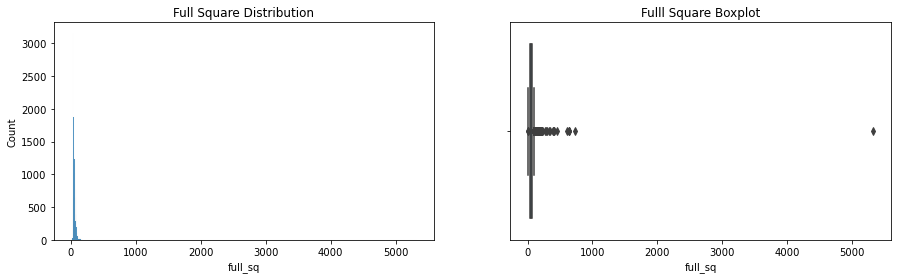

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
histplot = sns.histplot(data=sber_data, x='full_sq', ax=axes[0]);
histplot.set_title('Full Square Distribution');

boxplot = sns.boxplot(data=sber_data, x='full_sq', ax=axes[1]);
boxplot.set_title('Fulll Square Boxplot');

In [33]:
def outliers_iqr(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1- (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(sber_data, 'full_sq', 1, 6)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

    
    

Число выбросов по методу Тьюки: 59
Результирующее число записей: 30403


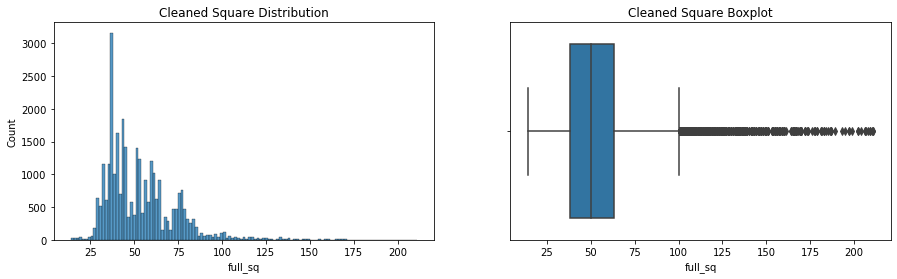

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Square Distribution');

boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Square Boxplot');

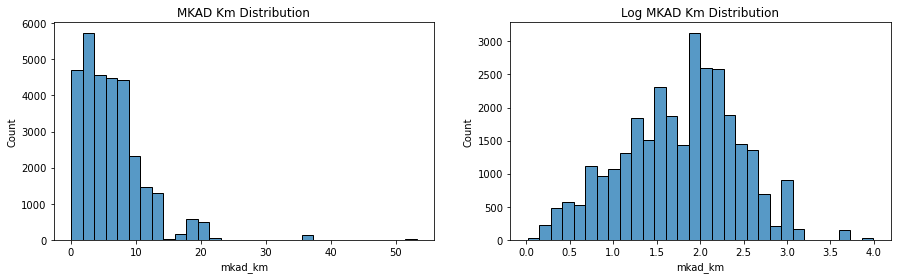

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15,4))
##гистограмма исходного признака
histplot = sns.histplot(sber_data['mkad_km'], bins=30, ax=axes[0]);
histplot.set_title('MKAD Km Distribution')

#гистограмма в логарифмическом масштабе
log_mkad_km= np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km , bins=30, ax=axes[1])
histplot.set_title('Log MKAD Km Distribution');



In [27]:
def outliers_z_score(data, feature, left =3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else: 
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(sber_data, 'mkad_km', left=3, right=3.5, log_scale=True)  
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

print(outliers['sub_area'].unique())

Число выбросов по методу z-отклонения: 0
Результирующее число записей: 30471
[]


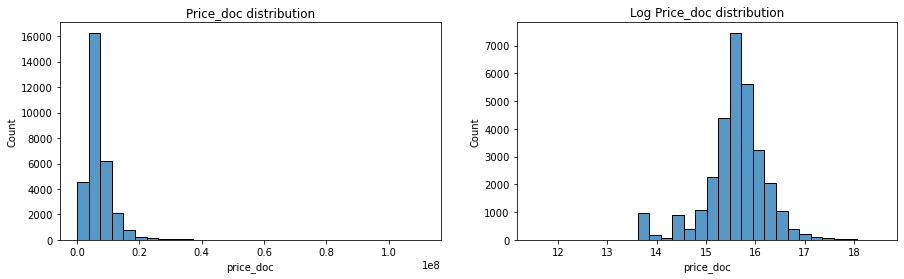

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

histplot = sns.histplot(sber_data['price_doc'], bins=30, ax=axes[0]);
histplot.set_title('Price_doc distribution');

log_price_doc = np.log(sber_data['price_doc'])
histplot = sns.histplot(log_price_doc, bins=30, ax=axes[1]);
histplot.set_title('Log Price_doc distribution');

In [30]:
outliers, cleaned = outliers_z_score(sber_data, 'price_doc', left=3, right=3.7, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 68
Результирующее число записей: 30403


In [34]:
outliers, cleaned = outliers_iqr(sber_data, 'price_doc', left=3, right=3, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 92
Результирующее число записей: 30379


### ОБНАРУЖЕНИЕ И ЛИКВИДАЦИЯ ДУБЛИКАТОВ

In [36]:
sber_data['id'].nunique() == sber_data.shape[0]

True

In [56]:
dupl_columns = list(sber_data.columns)
dupl_columns.remove('id')
mask = sber_data.duplicated(subset=dupl_columns)
sber_duplicates = sber_data[mask]
print(f'Число найденных дубликатов: {sber_duplicates.shape[0]}')

Число найденных дубликатов: 562


In [57]:
sber_dedupped = sber_data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {sber_dedupped.shape[0]}')

Результирующее число записей: 29909


### ОБНАРУЖЕНИЕ И ЛИКВИДАЦИЯ НЕИНФОРМАТИВНЫХ ПРИЗНАКОВ